In [101]:
import pandas as pd
import numpy as np  # For mathematical calculations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")

In [102]:
# Train file will be used for training the model, i.e. our model will learn from this file. It contains all the
# independent variables and the target variable. Test file contains all the independent variables, but not the target
# variable. We will apply the model to predict the target variable for the test data. Sample submission file contains
# the format in which we have to submit our predictions. Reading data

train = pd.read_csv("C:/Users/keonyango/OneDrive - National Bank of Kenya Ltd/Master Folder/Data Science Materials/credit_risk_dataset_training.csv")
test = pd.read_csv("C:/Users/keonyango/OneDrive - National Bank of Kenya Ltd/Master Folder/Data Science Materials/credit_risk_dataset_test.csv")

In [103]:
# Let’s make a copy of train and test data so that even if we
# have to make any changes in these datasets we would not lose the original datasets.
train_original = train.copy()
test_original = test.copy()

In [104]:
train.keys()
print(train.columns)
print(test.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


In [105]:
# print data_types for each variables
print(train.dtypes)
print(train.shape, test.shape)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
(22850, 12) (9731, 12)


In [106]:
# Analysis
train['loan_status'].value_counts()

0    17816
1     5034
Name: loan_status, dtype: int64

<AxesSubplot:>

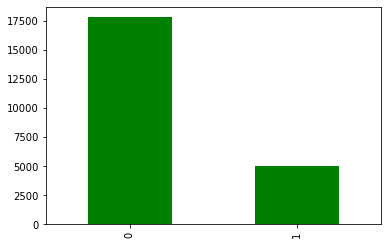

In [107]:
# Normalise can be set to true to print the proportions instead of Numbers.
train['loan_status'].value_counts(normalize=True)
train['loan_status'].value_counts().plot.bar(color="green")

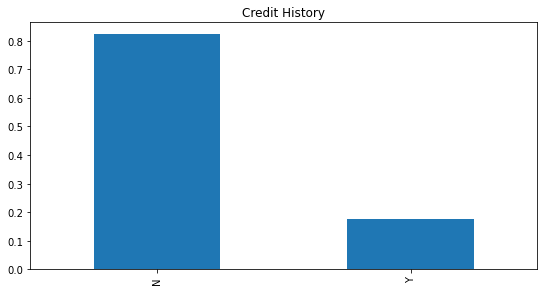

In [108]:
# visualize each variable separately
# Categorical features: These features have categories (cb_person_default_on_file, Loan_Status)
# Ordinal features: Variables in categorical features having some order involved (loan_intent,person_home_ownership,loan_grade)
# Numerical features: These features have numerical values (person_age,person_income,person_emp_length,loan_amnt,loan_int_rate
# loan_percent_income,cb_person_cred_hist_length)

# i.Categorical Varialbles
plt.figure(1)
plt.subplot(221)
train['cb_person_default_on_file'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Credit History')

plt.show()

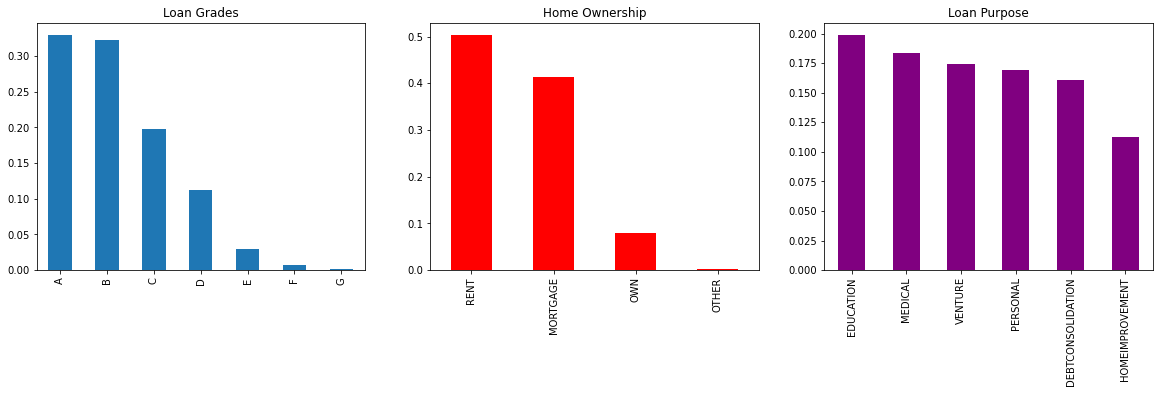

In [109]:
# i.Ordinal Varialbles
plt.figure(1)
plt.subplot(231)
train['loan_grade'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Loan Grades')
plt.subplot(232)
train['person_home_ownership'].value_counts(normalize=True).plot.bar(figsize = (20,10), color="Red",  title = 'Home Ownership')
plt.subplot(233)
train['loan_intent'].value_counts(normalize=True).plot.bar(figsize = (20,10),color="purple", title = 'Loan Purpose')
plt.show()

<AxesSubplot:>

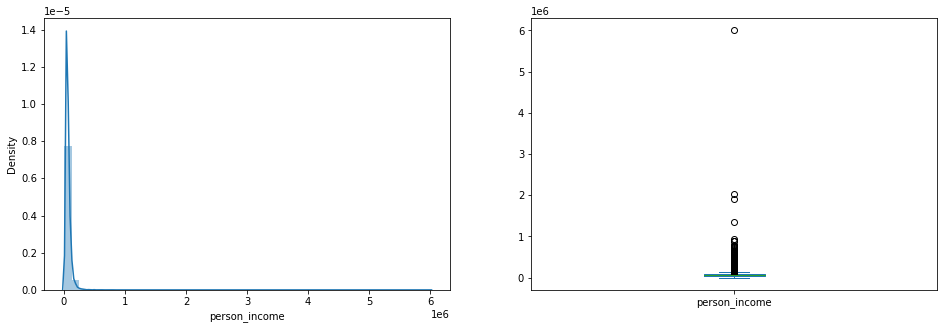

In [110]:
# Lets visualise Numerical data

plt.figure(1)
plt.subplot(121)
sns.distplot(train['person_income']);

plt.subplot(122)
train['person_income'].plot.box(figsize=(16, 5))

# The boxplot confirms the presence of a lot of extreme values.
# This can be attributed to the income disparity in the society.

<AxesSubplot:>

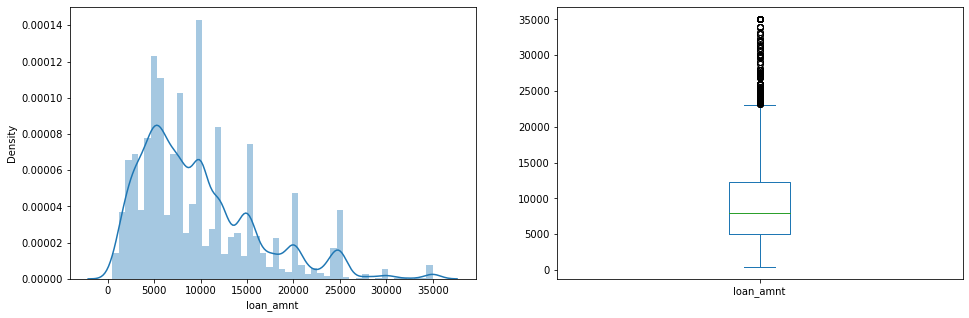

In [111]:
# Let’s look at the distribution of LoanAmount variable.

plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['loan_amnt']);

plt.subplot(122)
train['loan_amnt'].plot.box(figsize=(16, 5))

In [112]:
# Missing Values and Outliers Treatements

train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22850 non-null  int64  
 1   person_income               22850 non-null  int64  
 2   person_home_ownership       22850 non-null  object 
 3   person_emp_length           22237 non-null  float64
 4   loan_intent                 22850 non-null  object 
 5   loan_grade                  22850 non-null  object 
 6   loan_amnt                   22850 non-null  int64  
 7   loan_int_rate               20703 non-null  float64
 8   loan_status                 22850 non-null  int64  
 9   loan_percent_income         22850 non-null  float64
 10  cb_person_default_on_file   22850 non-null  object 
 11  cb_person_cred_hist_length  22850 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [113]:
# There are missing values in loan_int_rate, person_emp_length,
# 1) We will treat the missing values in all the features one by one.
# 2) We can consider these methods to fill the missing values:

# a)For numerical variables: imputation using mean or median
# b)For categorical variables: imputation using mode

In [114]:
train['person_emp_length'].fillna(train['person_emp_length'].mean(), inplace=True)
train['loan_int_rate'].fillna(train['loan_int_rate'].mean(), inplace=True)

#Check
train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [115]:
# As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in
# the test dataset too with the same approach.

test['person_emp_length'].fillna(test['person_emp_length'].mean(), inplace=True)
test['loan_int_rate'].fillna(test['loan_int_rate'].mean(), inplace=True)

#Check
test.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                    0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                   9731
dtype: int64

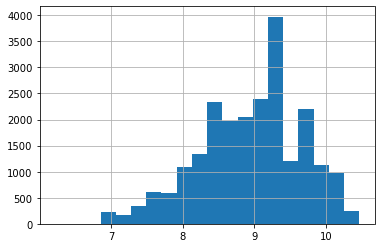

In [116]:
# Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously
# To remove the skewness due to outliers, we use log transformation to get a normal distribution
train['loan_amnt_log'] = np.log(train['loan_amnt'])
train['loan_amnt_log'].hist(bins=20)
test['loan_amnt_log'] = np.log(test['loan_amnt'])

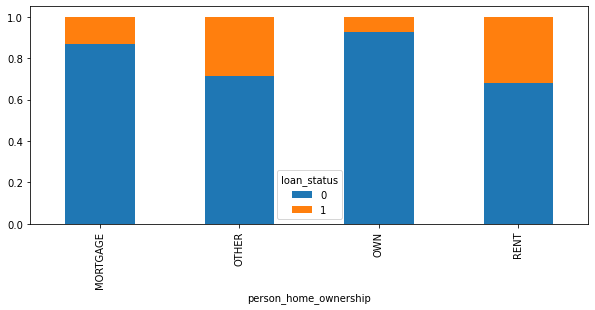

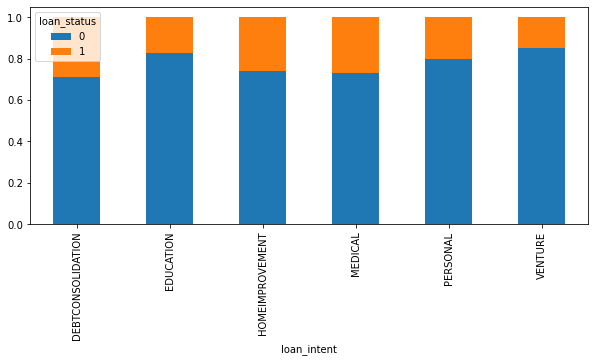

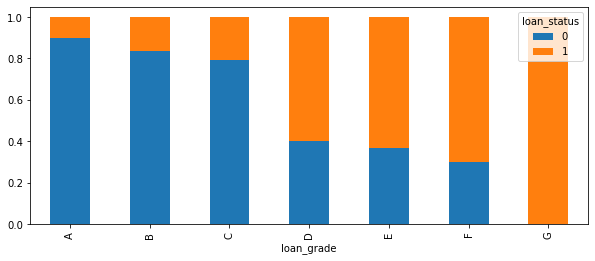

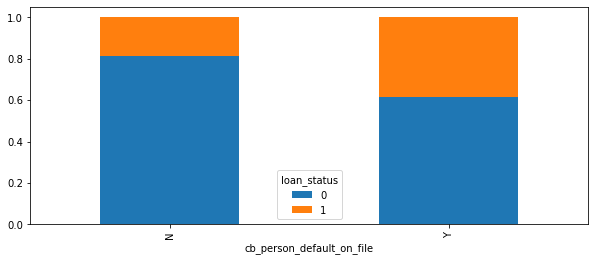

In [117]:
# Categorical Independent Variable vs Target Variable
# person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
person_home_ownership = pd.crosstab(train['person_home_ownership'], train['loan_status'])
person_home_ownership.div(person_home_ownership.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,4))
plt.show()

loan_intent = pd.crosstab(train['loan_intent'], train['loan_status'])
loan_intent.div(loan_intent.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,4))
plt.show()

loan_grade = pd.crosstab(train['loan_grade'], train['loan_status'])
loan_grade.div(loan_grade.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,4))
plt.show()

cb_person_default_on_file = pd.crosstab(train['cb_person_default_on_file'], train['loan_status'])
cb_person_default_on_file.div(cb_person_default_on_file.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,4))
plt.show()

<AxesSubplot:xlabel='loan_status'>

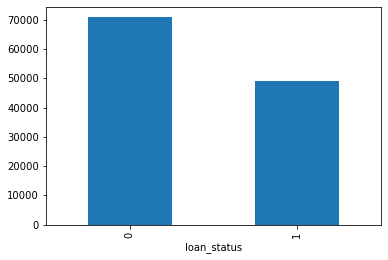

In [118]:
#  let’s visualize numerical independent variables with respect to target variable.
train.groupby('loan_status')['person_income'].mean().plot.bar()

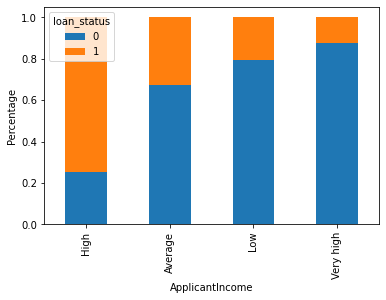

In [119]:
bins = [10000,20000,40000,60000,800000]
group = ['High', 'Average', 'Low', 'Very high']
train['Income_bin'] = pd.cut(train['person_income'], bins, right=True, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['loan_status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

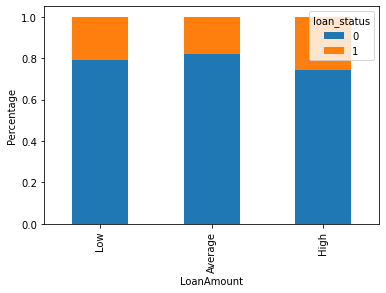

In [120]:
bins = [1000,5000,10000,20000]
group = ['Low','Average','High']
train['loan_amnt_bin'] = pd.cut(train['loan_amnt'],bins, labels = group)
loan_amnt_bin = pd.crosstab(train['loan_amnt_bin'],train['loan_status'])
loan_amnt_bin.div(loan_amnt_bin.sum(1).astype(float), axis = 0).plot(kind ='bar',stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

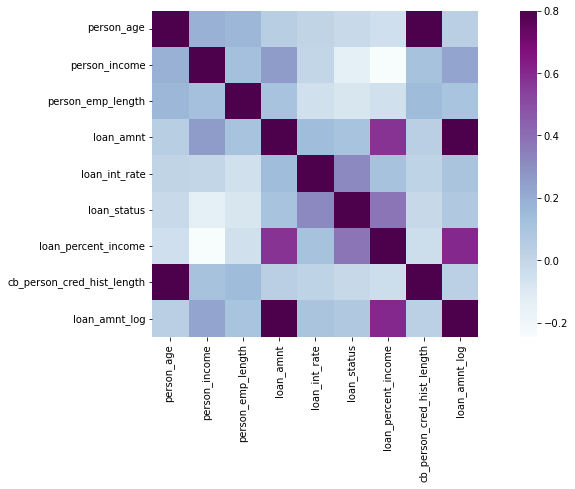

In [121]:
# lets look at the correlation between all the numerical variables
# The variables with darker color means their correlation is more.
matrix = train.corr()
f,ax = plt.subplots(figsize =(15,6))
sns.heatmap(matrix,vmax = .8,square= True, cmap='BuPu')
plt.show()

In [122]:
# Model Building : Part I
# Let us make our model to predict the target variable.
# We will start with Logistic Regression which is used for predicting binary outcome.

In [123]:
X = train.drop('loan_status', 1)
y = train.loan_status

In [124]:
# we will make dummy variables for the categorical variables

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [125]:
# We will use the train_test_split function from sklearn to divide our train dataset.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18280, 34)
y_train shape: (18280,)
X_test shape: (4570, 34)
y_test shape: (4570,)


In [126]:
# the baseline accuracy score for your model
y_train.value_counts(normalize = True).max()

0.7816192560175055

In [127]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.78


In [128]:
# The dataset has been divided into training and validation part.
# Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Iterate
# Build & Fit Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [129]:
# Calculate the training and test accuracy scores for your model.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.81
Test Accuracy: 0.79


In [130]:
# Let’s make predictions for the test dataset.

y_pred = model.predict(X_test)

In [131]:
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [132]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3470,   58],
       [ 880,  162]], dtype=int64)

In [133]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [134]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:200]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [135]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree Classifier is:  0.8897155361050328


In [136]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3273  255]
 [ 249  793]]


In [137]:
# Fitting XGBClassifier to the Training set

!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [138]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [140]:
gbm_param_grid = {
    'n_estimators': range(1, 1000, 10),
    'max_depth': range(1, 20),
    'learning_rate': [.1, .4 ,.45, .5, .55, .6], 
}

xgb_classifier = XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                   estimator = xgb_classifier, scoring = "accuracy",
                                   verbose = 0, n_iter = 100, cv = 4)
xgb_random.fit(X_train, y_train)
print(f'Best parameters: {xgb_random.best_params_}')

y_pred = xgb_random.predict(X_test)
print(f'Accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

Best parameters: {'n_estimators': 241, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.9315098468271334


In [141]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3496   32]
 [ 281  761]]


In [142]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

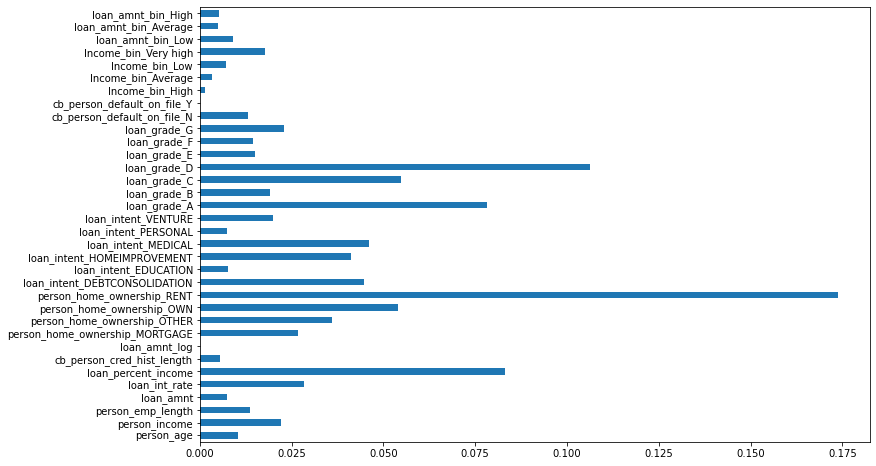

In [143]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12, 8))

plt.show()

<AxesSubplot:>

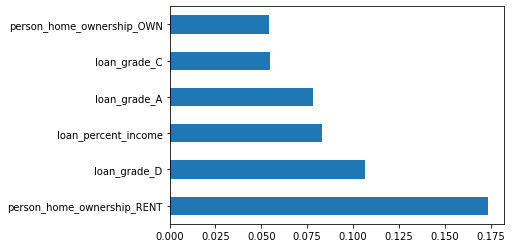

In [144]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(6)
   .plot(kind='barh'))